<a href="https://colab.research.google.com/github/suryatejaganji/NLP-2303A51L19-27/blob/main/NLP%20AS-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.utils import simple_preprocess

# List of words
words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'london', 'england']

# Prepare data for training Word2Vec
# For simplicity, treat each word as a sentence
sentences = [[word] for word in words]

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=1, min_count=1, sg=0)

# Find most similar words (example)
similarity = model.wv.most_similar('king')
print("Most similar words to 'king':")
for word, score in similarity:
    print(f"{word}: {score:.4f}")

Most similar words to 'king':
woman: 0.1366
england: 0.1320
queen: 0.1125
paris: 0.0449
man: 0.0296
london: -0.1755
france: -0.2187


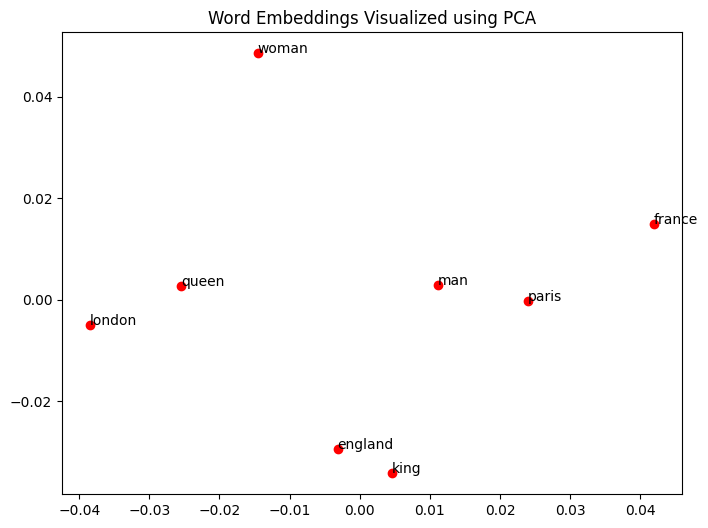

In [6]:
import gensim
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'london', 'england']


sentences = [
    ['king', 'is', 'a', 'man', 'who', 'rules', 'a', 'kingdom'],
    ['queen', 'is', 'a', 'woman', 'who', 'rules', 'a', 'kingdom'],
    ['man', 'is', 'a', 'male', 'human'],
    ['woman', 'is', 'a', 'female', 'human'],
    ['paris', 'is', 'the', 'capital', 'of', 'france'],
    ['london', 'is', 'the', 'capital', 'of', 'england'],
    ['france', 'is', 'in', 'europe'],
    ['england', 'is', 'in', 'europe'],
    ['king', 'and', 'queen', 'are', 'royalty'],
    ['man', 'and', 'woman', 'are', 'humans'],
    ['paris', 'and', 'london', 'are', 'cities'],
]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4) # add this line to train a Word2Vec model

# Visualizing Word Embeddings using PCA
words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'london', 'england']
word_vectors = model.wv # assign the word vectors from the trained model to the variable
word_vecs = [word_vectors[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(word_vecs)

plt.figure(figsize=(8, 6))
plt.scatter(result[:, 0], result[:, 1], c='red')

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Word Embeddings Visualized using PCA")
plt.show()

In [10]:


import spacy

# Load SpaCy model for Linguistic Structure and Dependency Parsing
nlp = spacy.load("en_core_web_sm")

# Example sentence for analysis
sentence = "The quick brown fox jumps over the lazy dog."

# Parse sentence using SpaCy
doc = nlp(sentence)

# Display linguistic structure and dependency parsing
for token in doc:
    print(f"Word: {token.text:<12}, POS: {token.pos_:<10}, Dependency: {token.dep_:<10}, Head: {token.head.text}")

Word: The         , POS: DET       , Dependency: det       , Head: fox
Word: quick       , POS: ADJ       , Dependency: amod      , Head: fox
Word: brown       , POS: ADJ       , Dependency: amod      , Head: fox
Word: fox         , POS: NOUN      , Dependency: nsubj     , Head: jumps
Word: jumps       , POS: VERB      , Dependency: ROOT      , Head: jumps
Word: over        , POS: ADP       , Dependency: prep      , Head: jumps
Word: the         , POS: DET       , Dependency: det       , Head: dog
Word: lazy        , POS: ADJ       , Dependency: amod      , Head: dog
Word: dog         , POS: NOUN      , Dependency: pobj      , Head: over
Word: .           , POS: PUNCT     , Dependency: punct     , Head: jumps
